## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Reading the twitter-spam data using pandas

In [2]:
df=pd.read_csv('/Users/Harshini Badam/Desktop/Pattern project/data.csv')
print('Shape : ',df.shape)
df.head()

Shape :  (11968, 8)


,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam


In [3]:
df.drop(["following","Id","actions","is_retweet","location","followers"],axis=1,inplace=True)

In [4]:
df

,Tweet,Type
0,It's the everything else that's complicated. #...,Quality
1,Eren sent a glare towards Mikasa then nodded a...,Quality
2,I posted a new photo to Facebook http://fb.me/...,Quality
3,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,Spam
4,Pedophile Anthony Weiner is TERRIFIED of Getti...,Spam
...,...,...
11963,11:11 meet harry,Quality
11964,If BBC Food disappears the loss of knowledge w...,Quality
11965,Look What Liberals Did to This Historic Monume...,Spam
11966,"I uploaded a new track, ""Everyday Lite 1"", on ...",Quality


In [5]:
df.columns = ["Tweet","Type"]

In [6]:
df=df.dropna()

In [7]:
duplicate_rows = df[df.duplicated()]
print('Number of duplicate tweets : ',len(duplicate_rows))

Number of duplicate tweets :  181


In [8]:
df = df.drop_duplicates()

In [9]:
df.reset_index(inplace=True)

In [10]:
d = {"Quality":0,"Spam":1}
df["Type"] = df["Type"].apply(lambda x : d[x])

## Data Analysis

Analysing the statistical measures of the data:

In [11]:
df.describe()

,index,Type
count,11787.000000,11787.000000
mean,5965.593620,0.492407
std,3457.079014,0.499964
min,0.000000,0.000000
25%,2969.500000,0.000000
50%,5955.000000,0.000000
75%,8964.500000,1.000000
max,11967.000000,1.000000


Displaying the Datatype and the number of Non-Null values of each column in the dataset:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11787 entries, 0 to 11786
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   11787 non-null  int64 
 1   Tweet   11787 non-null  object
 2   Type    11787 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.4+ KB


Analysing the target variable count to check whether the data is biased to any of the target variable:

In [13]:
df['Type'].value_counts()

Type
0    5983
1    5804
Name: count, dtype: int64

Analysing the Null values w.r.t each feature:

In [14]:
df.isna().sum()

index    0
Tweet    0
Type     0
dtype: int64

## Text Cleaning and preprocessing:

In [15]:
!pip install bs4

In [16]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Harshini
[nltk_data]     Badam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from bs4 import BeautifulSoup
from tqdm import tqdm
preprocessed_Tweets = []

for sentance in tqdm(df['Tweet'].values):

    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords.words('english'))
    preprocessed_Tweets.append(sentance.strip())

100%|███████████████████████████████████████████████████████████████████████████| 11787/11787 [01:15<00:00, 155.92it/s]


In [19]:
print(df["Tweet"][0])
print(preprocessed_Tweets[0])

It's the everything else that's complicated. #PESummit #PXpic.twitter.com/Jsv6BAFQMl
everything else complicated pesummit


In [20]:
df["Preprocessed_tweets"] = preprocessed_Tweets

In [21]:
df.to_csv("preprocessed_tweets.csv",index=None)

Identifying the number of unique words in the cleaned tweets:

In [22]:
words=[]
for i in tqdm(preprocessed_Tweets):
    for j in i.split():
        words.append(j)
print('Number of unique words is : ',len(set(words)))

100%|████████████████████████████████████████████████████████████████████████| 11787/11787 [00:00<00:00, 356676.82it/s]

Number of unique words is :  21583


### Distribution plot of length of the tweets:

In [23]:
l = []
for x in df["Preprocessed_tweets"] :
    l.append(len(x.split()))


In [24]:
df["Tweet_length"] = l

In [25]:
df.columns

Index(['index', 'Tweet', 'Type', 'Preprocessed_tweets', 'Tweet_length'], dtype='object')

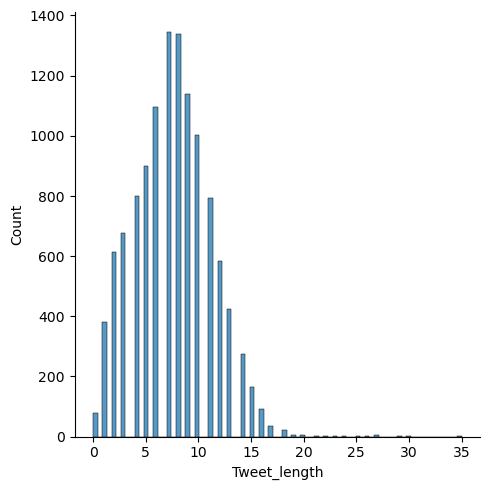

In [26]:
sns.displot(df['Tweet_length'])
plt.show()

In [27]:
df["Type"].mean()

0.4924068889454484

## Splitting the data into train and test:

In [28]:
df['Tweet_label']= df['Type']
labels = df['Tweet_label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df["Preprocessed_tweets"],labels, test_size=0.2, random_state=None)

In [29]:
max_len = 20
trunc_type = "post"
padding_type = "pre"
oov_tok = "<OOV>"


In [30]:
token = Tokenizer( char_level=False, oov_token = oov_tok) # oov_token is used for out of vocabulary
token.fit_on_texts(X_train)

In [31]:
#token.word_index
len(token.word_index)

18859

In [32]:
vocab_size = len(token.word_index)+1 # 1 is added because of padding (0) and one more thing 0 is not present in tokenizer vocabulary it will start from 1

In [33]:
word_index = token.word_index
c = list(word_index.keys())
c[0:10]

['<OOV>',
 'trump',
 'news',
 'new',
 'rt',
 'twitter',
 'like',
 'get',
 'com',
 'people']

## Replacing each token with the respective token and then padding the sequences :

In [34]:
x_train_seq = token.texts_to_sequences(X_train)
train_pad_seq = pad_sequences (x_train_seq, maxlen = max_len, padding = padding_type, truncating = trunc_type )
x_test_seq = token.texts_to_sequences(X_test)
test_pad_seq = pad_sequences(x_test_seq, maxlen = max_len,padding = padding_type, truncating = trunc_type)

In [35]:
print('Shape of training tweets: ', train_pad_seq.shape)
print('Shape of testing tweets: ', test_pad_seq.shape)

Shape of training tweets:  (9429, 20)
Shape of testing tweets:  (2358, 20)


In [36]:
print('Actual tweet:\n',X_train.iloc[5])
print('\ntweet sentence represented in terms of tokens and not padded :\n ',x_train_seq[5])
print('\nAfter padding : \n',train_pad_seq[5])

Actual tweet:
 new study examining cannabis use pregnancy

tweet sentence represented in terms of tokens and not padded :
  [4, 926, 4833, 4834, 159, 2028]

After padding : 
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    4  926 4833 4834  159 2028]


In [37]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import classification_report

## Applying Model's:

In [38]:
Earn_lstm=128
embeding_dim =128
drop_lstm =0.2
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(LSTM(n_lstm, dropout=drop_lstm,return_sequences=False))

model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
num_epochs = 20
history = model.fit(train_pad_seq,Y_train, epochs=num_epochs,validation_data=(test_pad_seq, Y_test), verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 128)           2414080   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2545793 (9.71 MB)
Trainable params: 2545793 (9.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
295/295 - 28s - loss: 0.4933 - accuracy: 0.7554 - val_loss: 0.4001 - val_accuracy: 0.8223 - 28s/epoch - 94ms/step
Epoch 2/20
295/295 - 20s - loss: 0.2065 - accuracy: 0.9207 - val_loss: 0.4424 - val_accuracy: 0.8104 - 20s/epoch - 67ms/step
Epoch 3/20
295/295 - 20s - loss:

Training Results
              precision    recall  f1-score   support

           0     0.9966    0.9946    0.9956      4786
           1     0.9944    0.9966    0.9955      4643

    accuracy                         0.9955      9429
   macro avg     0.9955    0.9956    0.9955      9429
weighted avg     0.9955    0.9955    0.9955      9429



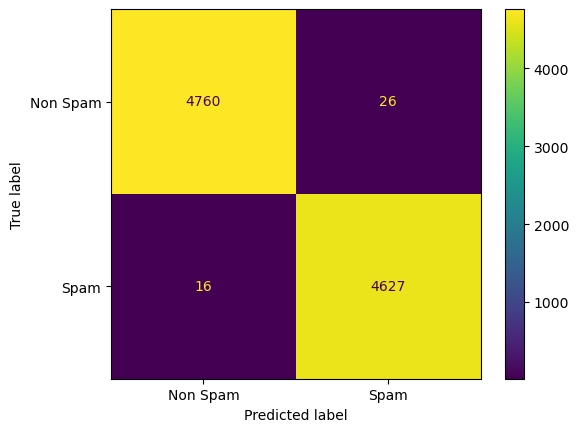

Testing Results
              precision    recall  f1-score   support

           0     0.8022    0.7452    0.7726      1197
           1     0.7552    0.8105    0.7819      1161

    accuracy                         0.7774      2358
   macro avg     0.7787    0.7779    0.7773      2358
weighted avg     0.7790    0.7774    0.7772      2358



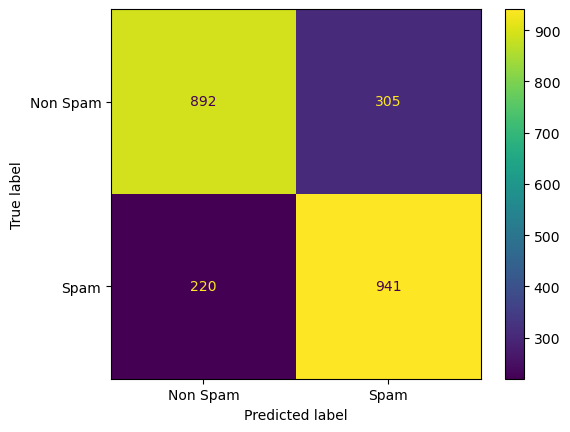

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Training Results")
yhat_probs = model.predict(train_pad_seq, verbose=0)
pred = np.where(yhat_probs>0.5,1,0)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Non Spam","Spam"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model.predict(test_pad_seq, verbose=0)
pred = np.where(yhat_probs>0.5,1,0)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Non Spam","Spam"])
disp.plot()
plt.show()
model.save("lstm1.h5")

In [40]:
n_lstm=256
embeding_dim =128
drop_lstm =0.2
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm,return_sequences=False))

model1.add(Dense(1, activation='sigmoid'))
model1.summary()

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
num_epochs = 20
history = model1.fit(train_pad_seq,Y_train, epochs=num_epochs,validation_data=(test_pad_seq, Y_test), verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 128)           2414080   
                                                                 
 lstm_1 (LSTM)               (None, 256)               394240    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2808577 (10.71 MB)
Trainable params: 2808577 (10.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
295/295 - 34s - loss: 0.4860 - accuracy: 0.7544 - val_loss: 0.3960 - val_accuracy: 0.8244 - 34s/epoch - 114ms/step
Epoch 2/20
295/295 - 25s - loss: 0.2032 - accuracy: 0.9233 - val_loss: 0.4331 - val_accuracy: 0.8244 - 25s/epoch - 84ms/step
Epoch 3/20
295/295 - 25s - 

Training Results
              precision    recall  f1-score   support

           0     0.9969    0.9996    0.9982      4786
           1     0.9996    0.9968    0.9982      4643

    accuracy                         0.9982      9429
   macro avg     0.9982    0.9982    0.9982      9429
weighted avg     0.9982    0.9982    0.9982      9429



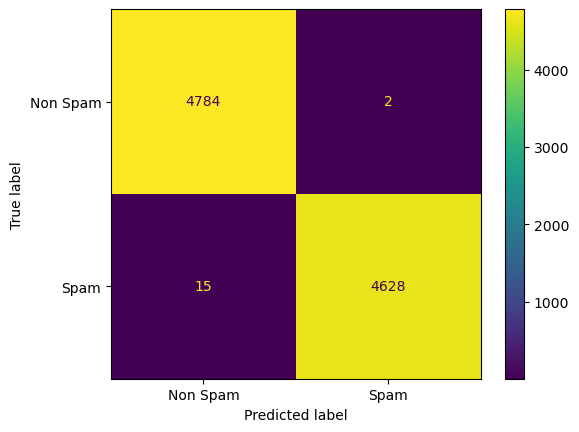

Testing Results
              precision    recall  f1-score   support

           0     0.7919    0.8012    0.7965      1197
           1     0.7925    0.7829    0.7877      1161

    accuracy                         0.7922      2358
   macro avg     0.7922    0.7921    0.7921      2358
weighted avg     0.7922    0.7922    0.7922      2358



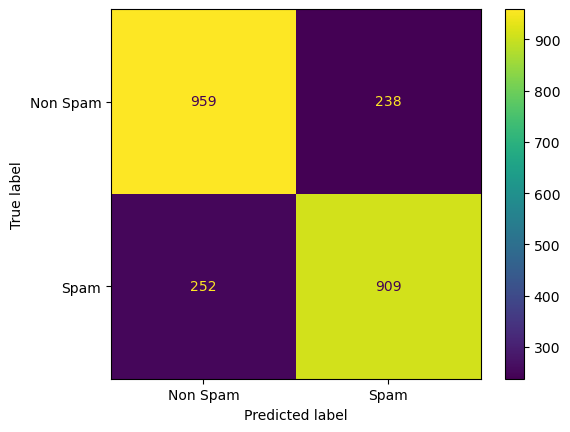

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Training Results")
yhat_probs = model1.predict(train_pad_seq, verbose=0)
pred = np.where(yhat_probs>0.5,1,0)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Non Spam","Spam"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model1.predict(test_pad_seq, verbose=0)
pred = np.where(yhat_probs>0.5,1,0)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Non Spam","Spam"])
disp.plot()
plt.show()
model1.save("lstm2.h5")

# Bi-Directional LSTM's

In [42]:
n_lstm=128
embeding_dim =128
drop_lstm =0.2
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm,return_sequences=False)))

model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model2.summary()

num_epochs = 20
history = model2.fit(train_pad_seq, Y_train, epochs=num_epochs, validation_data=(test_pad_seq, Y_test), verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 128)           2414080   
                                                                 
 bidirectional (Bidirection  (None, 20, 256)           263168    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3071745 (11.72 MB)
Trainable params: 3071745 (11.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
295

Training Results
              precision    recall  f1-score   support

           0     0.9946    0.9998    0.9972      4786
           1     0.9998    0.9944    0.9971      4643

    accuracy                         0.9971      9429
   macro avg     0.9972    0.9971    0.9971      9429
weighted avg     0.9972    0.9971    0.9971      9429



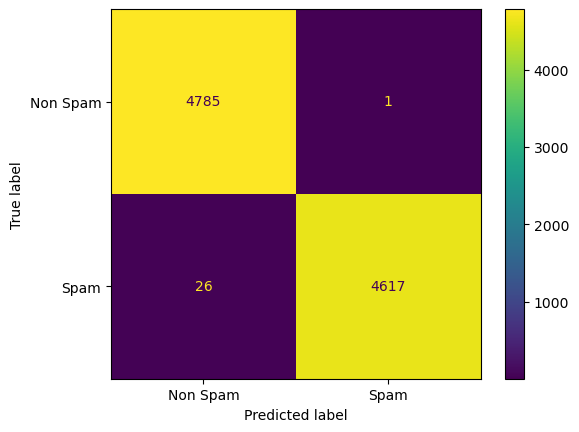

Testing Results
              precision    recall  f1-score   support

           0     0.7817    0.8195    0.8002      1197
           1     0.8042    0.7640    0.7836      1161

    accuracy                         0.7922      2358
   macro avg     0.7929    0.7918    0.7919      2358
weighted avg     0.7928    0.7922    0.7920      2358



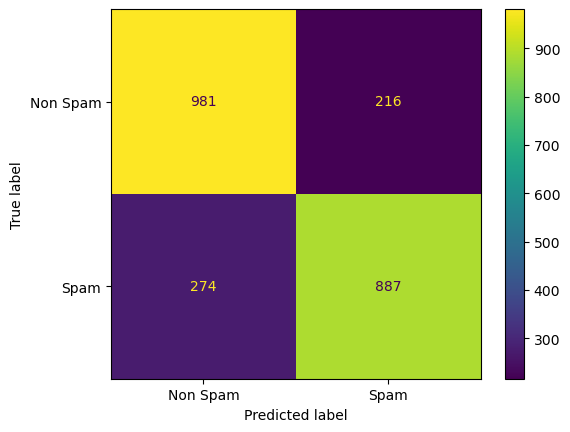

In [43]:
print("Training Results")
yhat_probs = model2.predict(train_pad_seq, verbose=0)
pred = np.where(yhat_probs>0.5,1,0)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Non Spam","Spam"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model2.predict(test_pad_seq, verbose=0)
pred = np.where(yhat_probs>0.5,1,0)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Non Spam","Spam"])
disp.plot()
plt.show()

model2.save("bi-lstm1.h5")

In [44]:
n_lstm=256
embeding_dim =128
drop_lstm =0.2
model3 = Sequential()
model3.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model3.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model3.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm,return_sequences=False)))

model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model3.summary()

num_epochs = 20
history = model3.fit(train_pad_seq, Y_train, epochs=num_epochs, validation_data=(test_pad_seq, Y_test), verbose=2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 128)           2414080   
                                                                 
 bidirectional_2 (Bidirecti  (None, 20, 512)           788480    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 512)               1574912   
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 4777985 (18.23 MB)
Trainable params: 4777985 (18.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
295

Training Results
              precision    recall  f1-score   support

           0     0.9969    0.9998    0.9983      4786
           1     0.9998    0.9968    0.9983      4643

    accuracy                         0.9983      9429
   macro avg     0.9983    0.9983    0.9983      9429
weighted avg     0.9983    0.9983    0.9983      9429



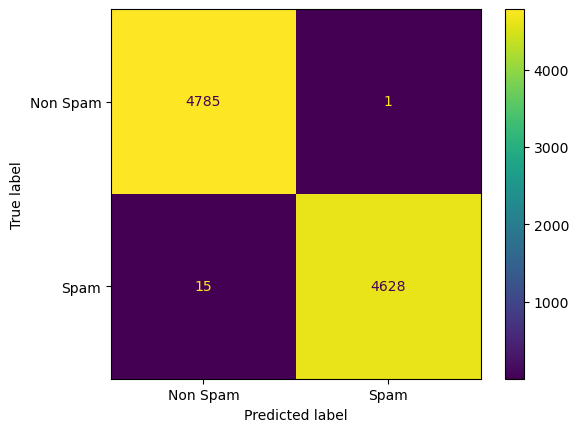

Testing Results
              precision    recall  f1-score   support

           0     0.7933    0.7277    0.7590      1197
           1     0.7413    0.8045    0.7716      1161

    accuracy                         0.7655      2358
   macro avg     0.7673    0.7661    0.7653      2358
weighted avg     0.7677    0.7655    0.7652      2358



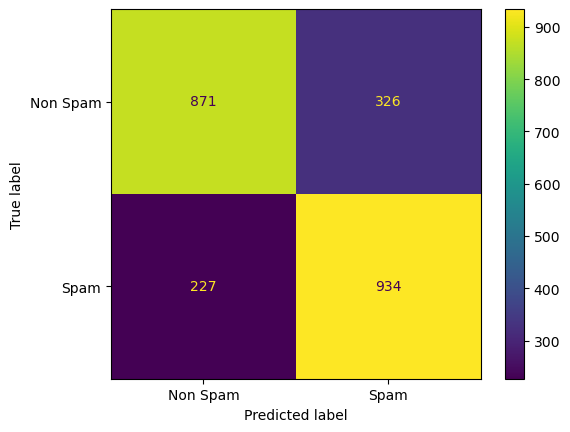

In [45]:



print("Training Results")
yhat_probs = model3.predict(train_pad_seq, verbose=0)
pred = np.where(yhat_probs>0.5,1,0)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Non Spam","Spam"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model3.predict(test_pad_seq, verbose=0)
pred = np.where(yhat_probs>0.5,1,0)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Non Spam","Spam"])
disp.plot()
plt.show()

model3.save("bi-lstm2.h5")